

# Project: Investigate a Dataset (Database_TMDb_movie_data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>#### Below is the column Discription
>
> **id**: A unique number for each movie
>
> **imdb_id**: A unique number for each movie w.r.t  imdb
>
> **popularity**: Number defines how popular the movie is
>
> **budget**: Expendure spent on the movies
>
> **revenue**: Revenue collected for the movie
>
> **original_title**: Movie Title
>
> **cast**: Cast in the movie separated by "\|"
>
> **homepage**: Website of the movie
>
> **director**: Name of the Director separated by "\|"
>
> **tagline**: Movie tagline
>
> **keywords**: Words to describe the movie
>
> **overview**: Description of the movie
>
> **runtime**: Movie time in minutes
>
> **genres**: Movie Type separated by "\|"
>
> **production_companies**: Name of the Production
>
> **release_date**: Release Date
>
> **vote_count**: Total Vote count
>
> **vote_average**: Average vote
>
> **release_year**: Release year
>
> **budget_adj**: Adjusted budget for inflation over time
>
> **revenue_adj**: Adjusted Revenue for inflation over time

### Question(s) for Analysis:
>#### 1. Does the popularity of genres change from year to year?
>#### 2. What are the Top 5 Movie Genres?
>#### 3. What is the budget and revenue for the top five most popular movies?
>#### 4. What are the top ten production companies that generate more than 75% of movie revenue?
>#### 5. What is the trend of movie runtimes by year?
>#### 6. Is there a relationship between runtime and movie popularity?
>#### 7. Is there a relationship between budget and movie popularity?
>#### 8. Does High Rating influence profit, revenue of movies ?
>#### 9. Which genres are associated with long runtime ?
>#### 10. What are the top ten actors associated with financially successful films?
>#### 11. What are the top ten most popular actors?
>#### 12. Which directors are responsible for the most popular films?


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> in this section I will create a clean_data() function to make all cleaning necessary for data, I will remove unrellated columns and keep just usefull columns.

In [99]:
#read the dataset
df = pd.read_csv('../input/tmdb-movies-dataset/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08



### Data Cleaning 
I will create function to make the cleaning work, to ensure i have a good and quality data fit for my analysis.

The function take the dataframe, drop duplicated data and null values then return dataframe after cleaning


In [100]:
def clean_data(df):
    #drop duplicate values
    df.drop_duplicates(keep= 'first',inplace = True)
    #drop null values
    df.dropna(inplace=True)
    return df 

check ho many rows and columns in our dataset befor any cleaning, we have 10866 roes and 21 columns

In [101]:
df.shape

(10866, 21)

check if we have nulls in our dataset

In [102]:
df.isnull().sum().any() 

True

show how many nulls in each column

In [103]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

##### we can see that, although imdb_id column is id for movies, it have 10 missing values, so I well remove it and keep only "id" column 
##### homepage, tagline, keywords and overview columns seems not as much usefull for our analysis also they have a lot of missing values, so I will remove them.



In [104]:
#drop unused columns from the dataset
df.drop(labels = ['imdb_id','homepage', 'budget_adj', 'revenue_adj','keywords', 'tagline','overview'],axis =1,inplace =True)

In [105]:
#check for 0 values in revenue, budget columns
zero_rev = sum(df['revenue'] == 0)
zero_bud = sum(df['budget'] == 0)
print('revenue have {} and budget have {} with zero value '.format(zero_rev, zero_bud))

revenue have 6016 and budget have 5696 with zero value 


#### As we can see, zeros value more than half of our data, if I fill it by mean this will corrupt our analysis, so I will remove all zeros rows.

In [106]:
#convert zeros to null then send data frame to clean_data function to remove all null values
data_zero = ['budget','revenue']

#this will replace all the value from '0' to NAN in the list
df[data_zero] = df[data_zero].replace(0, np.NAN)

#Removing all the row which has NaN values & duplicate
df = clean_data(df)


In [107]:
#check for data types 
df.dtypes

id                        int64
popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [108]:
#check for rows and columns after cleaning
df.shape

(3805, 14)

In [109]:
#change type of "released_date" to date
df['release_date'] = pd.to_datetime(df['release_date'])

# view changes
df.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

### Summary of Cleaning data step:
> ##### First I remove unrellated columns that will not usefull to our analysis
> ##### Remove all missing values because they are a lot of rows so we can't fill them by mean
> ##### Change data type or released_date 
> ##### At the end, we have 3805 rows and 14columns

In [110]:
# add profit column
df['profit'] = df['revenue'] - df['budget']
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08


### Ploting Functions for future use
* Line plot function
* bar plot function
* pie plot function
* Divide function for columns separated by "|"

In [111]:
# this function take dataframe, xlabel, ylabel and title needed, and present the line plot 
def display_lineplot(dataframe, xlabel, ylabel, title):
    dataframe.plot(kind='line', figsize=(10,5), color ='rebeccapurple')
    # set titles
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.title(title, fontsize = 14)
    # Display plot
    plt.show()

In [112]:
# this function take dataframe, xlabel, ylabel,title and labels if needed, and present the bar plot 
def display_barplot(dataframe, xlabel, ylabel, title, labels):
    dataframe.plot(kind='bar', tick_label=labels, figsize=(15,6), color = 'palevioletred')
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.title(title, fontsize = 16)
# display plot
    plt.show()

In [113]:
# this function take dataframe(5 values) , xlabel, ylabel and title needed, and present the pie plot 
def display_pieplot(dataframe, xlabel, ylabel, title):
    colors = ['salmon','aquamarine','plum','lightsteelblue','lightpink']
    dataframe.plot(kind='pie',figsize=(25,8),autopct='%1.2f%%', colors = colors, shadow = True)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.title(title, fontsize = 14)
    #display plot
    plt.show()

In [114]:
# this function will return value counts of each multi-values column
def divide(dataframe , col_name):
    #this take a column, and separates with '|'
    divide = dataframe[col_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    divide = pd.Series(divide.split('|'))
    
    #The result will be in descending order so that the first element is the most frequently-occurring element.
    frequency = divide.value_counts(ascending = False)
    
    return frequency

<a id='eda'></a>
## Exploratory Data Analysis


### 1. Does the popularity of genres change from year to year?
> because genres, cast,and director columns have multiple values, I will create temporary dataframe
> contain the first value only of each column to use it in comparision with other features without remove them from original dataframe

In [115]:
temp_data = df
# split genres column value and keep the first one
temp_data['genres'] = temp_data['genres'].apply(lambda x: x.split('|')[0])
# split production_companies column value and keep the first one
temp_data['production_companies'] = temp_data['production_companies'].apply(lambda x: x.split('|')[0])
# split cast column value and keep the first one
temp_data['cast']=temp_data['cast'].apply(lambda x: x.split('|')[0])
# split director column value and keep the first one
temp_data['director']=temp_data['director'].apply(lambda x: x.split('|')[0])

In [116]:
temp_data.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.316249e+09


In [117]:
#add new column, contain Years Group
bin_edges = [1960 ,1970 ,1980 ,1990 ,2000,2010,2022 ]
bin_names = [ '1960','1970','1980','1990','2000','2010']

temp_data['release_year_group'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)

In [118]:
#I will take only Top 10 genres for plotting
count=divide(temp_data, 'genres')
count


Drama              876
Comedy             775
Action             684
Adventure          312
Horror             272
Crime              171
Thriller           160
Fantasy            109
Animation          101
Science Fiction     98
Romance             65
Family              40
Mystery             36
Music               29
Documentary         23
War                 20
History             17
Western             16
TV Movie             1
dtype: int64

In [119]:
#count each genres in each year group
cross_tab = pd.crosstab(index=temp_data['release_year_group'],
                        columns=temp_data['genres'])
# we want to see only top 10 genres by each year
smallData = cross_tab[['Drama','Comedy','Action','Adventure','Horror','Crime','Fantasy','Animation',"Science Fiction"]]

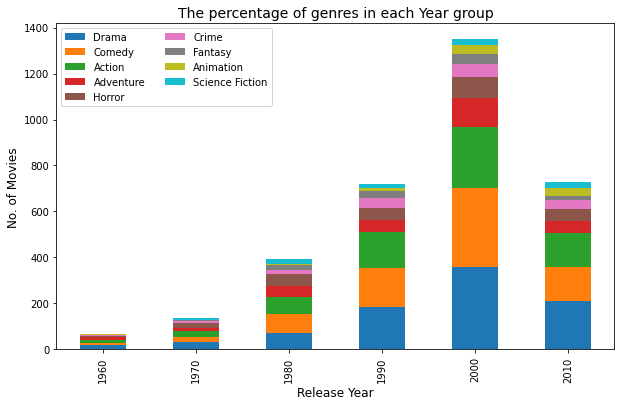

In [120]:
# plot above table as stakked bar graph
smallData.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.title('The percentage of genres in each Year group',fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("No. of Movies",fontsize=12)
plt.show()

#### Conclusion from the plot:
* The number of movies in the 1960s and 1970s is small, but we can see that the most popular genres are drama, comedy, and action.
* Drama, Comedy, Action, and Adventure and Horror have seen an increase since the 1980s.
* In the 1990s, the percentage remained the same, but the number of films increased. By 2000, the number of films had increased significantly, but drama, comedy, and action remained at the top.
* The number of movies in the 2010 group is decreasing (but our data is from 2015), but Drama, Comedy, and Action remain at the top.

### 2. What are the Top 5 Movie Genres?

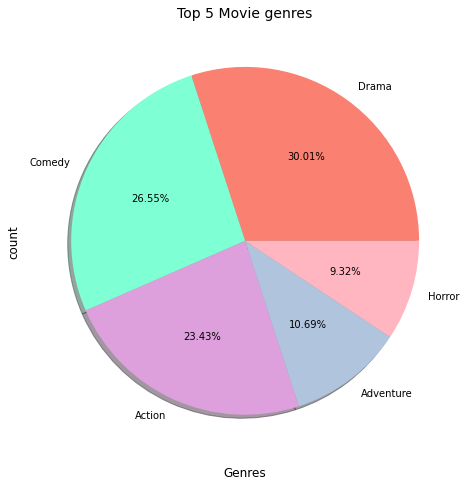

In [121]:
genres_count = divide(df,'genres')
display_pieplot(genres_count.nlargest(5),'Genres','count','Top 5 Movie genres')

### 3. What is the budget and revenue for the top five most popular movies?

In [122]:
data = df.groupby(['original_title'])['popularity'].sum().nlargest(5)
data
#display_barplot(data.index.nlargest(5), 'Movie', 'popularity', 'Top 5 popular movies',df[['revenue','budget']])

original_title
Jurassic World             32.985763
Mad Max: Fury Road         28.419936
Interstellar               24.949134
Guardians of the Galaxy    14.311205
Insurgent                  13.112507
Name: popularity, dtype: float64

In [123]:
#first, store titles of Top 5 popular movies
titles = ['Jurassic World', 'Mad Max: Fury Road','Interstellar','Guardians of the Galaxy','Insurgent']
#get subset of dataframe, only for Top 5 popular movies
data = df.loc[df['original_title'].isin(titles)]
# show table of revenue, budget associated with each popular movie
data[['original_title', 'revenue', 'budget','popularity']]


,original_title,revenue,budget,popularity
0,Jurassic World,1.513529e+09,150000000.0,32.985763
1,Mad Max: Fury Road,3.784364e+08,150000000.0,28.419936
2,Insurgent,2.952382e+08,110000000.0,13.112507
629,Interstellar,6.217525e+08,165000000.0,24.949134
630,Guardians of the Galaxy,7.733124e+08,170000000.0,14.311205


### 4. What are the top ten production companies that generate more than 75% of movie revenue?

In [124]:
#df['revenue'].describe() 
#store data of movies have more than 75% of revenue
high_rev = df.query('revenue > 1.260695e+08')
pod_comp = divide(high_rev,'production_companies').nlargest(10)


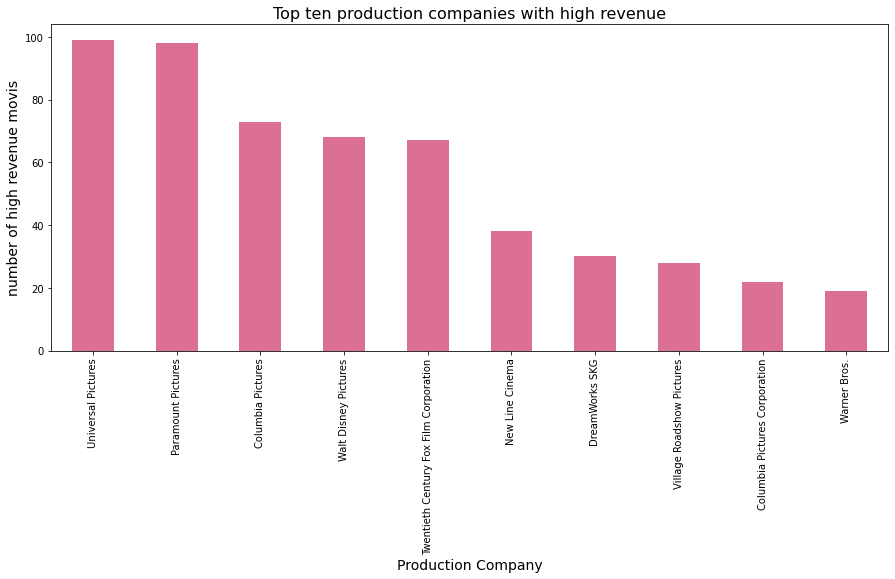

In [125]:
display_barplot(pod_comp, 'Production Company', 'number of high revenue movis', 'Top ten production companies with high revenue', None)


### 5. What is the trend of movie runtimes by year?

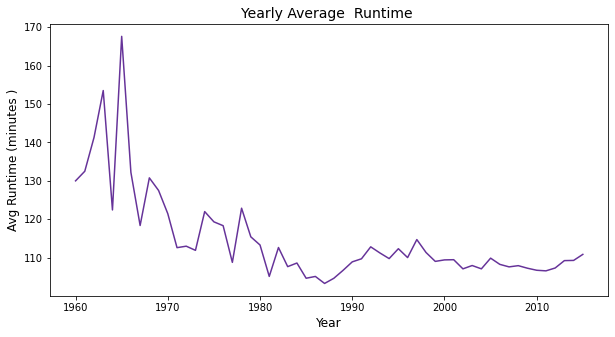

In [126]:
runbyyear = df.groupby('release_year')['runtime'].mean()
display_lineplot(runbyyear, 'Year', 'Avg Runtime (minutes )', 'Yearly Average  Runtime ')

#### we can notice that, there runtime decread by general, secially in 1987, this year have shortest runtime 

### 6. Is there a relationship between runtime and movie popularity?

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

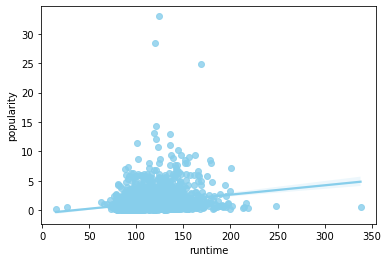

In [127]:
sns.regplot(x = "runtime", 
            y = "popularity", 
            data = df, color = 'skyblue')

#### Movies have runtime between 90-200 min are most popular

### 7. Is there a relationship between budget and movie popularity?

In [ ]:

sns.scatterplot(x= df["budget"], y= df['popularity'], color='red', alpha = 0.7)
sns.scatterplot(x= df['revenue'],y=  df['popularity'], color='skyblue', alpha = 0.6)
plt.title('relationship between budget, revenue and movie popularity')
plt.xlabel('Budget , Revenue')
plt.ylabel('Popularity')
plt.show()

In [129]:
print(np.corrcoef(df["budget"], df['popularity']) )

[[1.         0.44362641]
 [0.44362641 1.        ]]


In [130]:
print(np.corrcoef(df["revenue"], df['popularity']) )

[[1.         0.61379278]
 [0.61379278 1.        ]]


#### We can see from the above statistical correlation that the relationship between revenue and popularity is stronger than the relationship between budget and popularity.

### 8. Does High Rating influence profit, revenue of movies ?

In [131]:
voters = df.nlargest(10,'vote_average')
voters_top10 = voters.loc[:,['original_title', 'vote_average','revenue','profit']].head(10)
voters_top10

,original_title,vote_average,revenue,profit
4178,The Shawshank Redemption,8.4,2.834147e+07,3341469.0
7948,Stop Making Sense,8.4,4.978922e+06,3778922.0
7269,The Godfather,8.3,2.450664e+08,239066411.0
650,Whiplash,8.2,1.399309e+07,10693093.0
2409,Fight Club,8.1,1.008538e+08,37853753.0
2875,The Dark Knight,8.1,1.001922e+09,816921825.0
4177,Pulp Fiction,8.1,2.139288e+08,205928762.0
4179,Forrest Gump,8.1,6.779454e+08,622945399.0
9758,The Godfather: Part II,8.1,4.754284e+07,34542841.0
10222,Schindler's List,8.1,3.212658e+08,299265768.0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


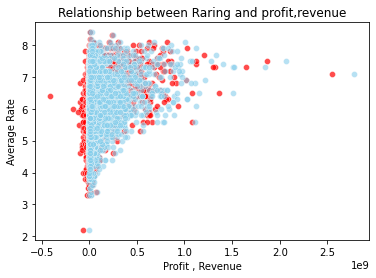

In [132]:

sns.scatterplot(df["profit"], df['vote_average'], color='red', alpha = 0.7)
sns.scatterplot(df['revenue'], df['vote_average'], color='skyblue', alpha = 0.6)
plt.title('Relationship between Raring and profit,revenue')
plt.xlabel('Profit , Revenue')
plt.ylabel('Average Rate')
plt.show()

In [133]:
#check the correlation
print(np.corrcoef(df["profit"], df['vote_average']) )

[[1.         0.26068671]
 [0.26068671 1.        ]]


In [134]:
print(np.corrcoef(df["revenue"], df['vote_average']) )

[[1.         0.22805085]
 [0.22805085 1.        ]]


#### When the correlation is less than 0.5, There is a weak positive relationship between high rating and profit and revenue.

### 9. Which genres are associated with long runtime ?

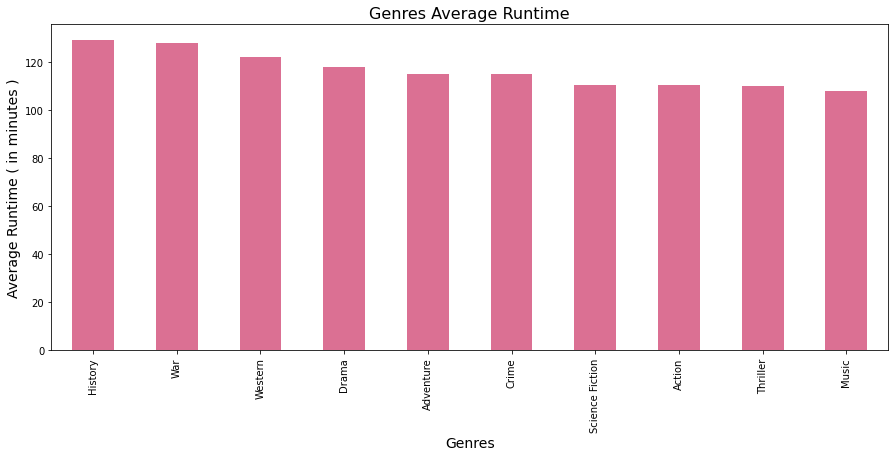

In [135]:
#I will take only Top 10 longest Runtime
avg_rt = temp_data.groupby('genres')['runtime'].mean().nlargest(10)
display_barplot(avg_rt , 'Genres','Average Runtime ( in minutes )', 'Genres Average Runtime',None)

#### It seems History Movies and War generally have Average Runtime more than 2h

### 10. What are the top ten actors associated with financially successful films?

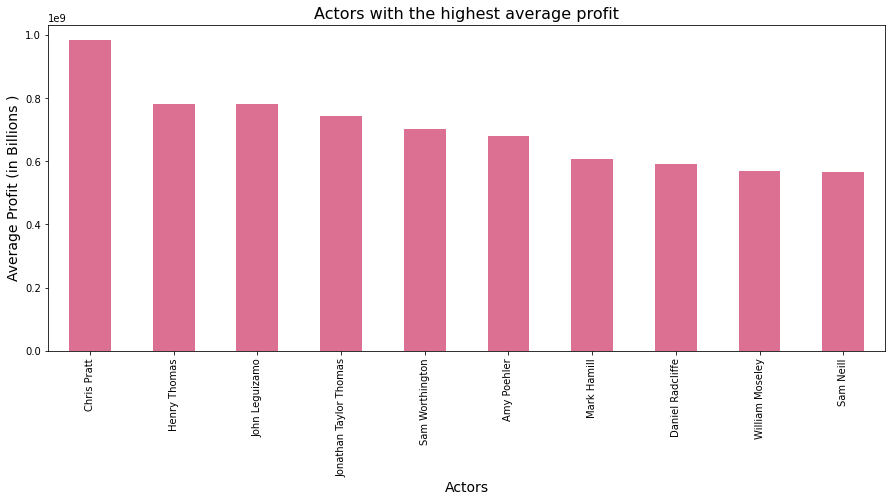

In [136]:
cast = temp_data.groupby('cast')['profit'].mean().nlargest(10)
display_barplot(cast , 'Actors','Average Profit (in Billions )', 'Actors with the highest average profit',None)

### 11. What are the top ten most popular actors?

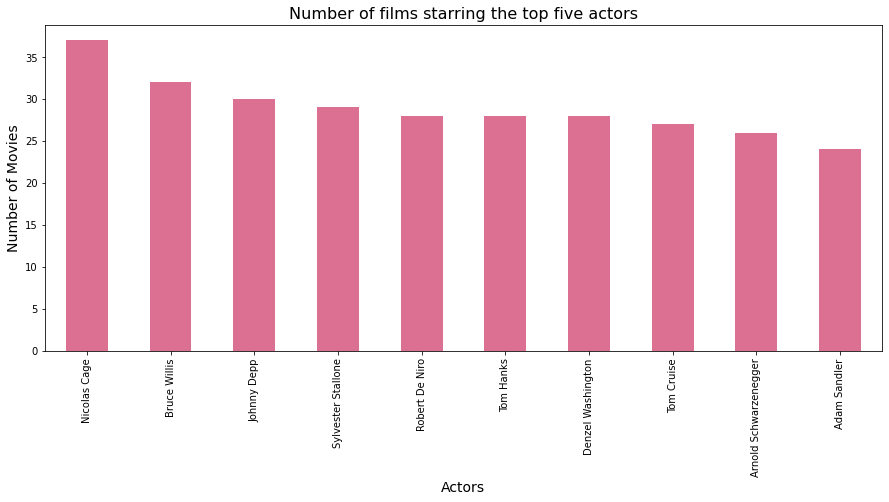

In [137]:
cast2 = divide(df,'cast').nlargest(10)
display_barplot(cast2 , 'Actors','Number of Movies', 'Number of films starring the top five actors',None)

#### Nicolas Cage have large number of popular movies more than 35

### 12. Which directors are responsible for the most popular films?

In [ ]:
directors = df.groupby('director')['popularity'].sum().nlargest(5)
display_pieplot(directors, 'Directors', 'Popular Movies','Top 5 Directors associated with most Popular movies')

<a id='conclusions'></a>
## Conclusions
### My finding are:
First, I looked to see if the popularity of genres changed from year to year, and I discovered that the top three genres from 1970 to 2012 were drama, comedy, and action, and that the number of released movies increased significantly from 2000 to 2010.

Furthermore, I created a pie chart representing the percentage of the Top 5 Genres, and Drama has a sizable portion, followed by Comedy.

After that, I wanted to see how much revenue and budget popular movies have, and I discovered that budgets range from $100million to $170 million, with revenue ranging from 151 million to 773 million.

I created a bar chart to represent the top ten production companies with the highest revenue (more than 75% of revenue), and I discovered that the top three production companies are: Universal Pictures, Columbia Pictures, and Paramount Pictures. Last but not least is DreamWorks Animation.

I was curious to see What is the trend of movie runtimes by year? I discovered that the shortest runtime (about 1 hour) was in 1985 and the longest runtime (about 2 hours) was in 1996, and movies with 90-200 minutes were more popular than others.

I wanted to see if there was a link between budget and movie popularity, and I discovered that there was. Furthermore, I created a comparison table of the Top 10 Movies by Voting, comparing revenue and profit for each one, and discovered that a high rating has a positive relationship with budget and revenue.

When I examined the relationship between genres and runtime, I discovered that movies in the 'History' and 'War' genres have the longest average runtime with more than 2 hours.

I created a bar plot to show the top five most popular actors, and the results are as follows: Chris Pratt is the highest-paid actor, with high-average-profitable films.

and Nicolas Cage have the most films, Christopher Nolan has the most popular films with 28.49% of the vote.
Finally, I believe it is better to see which actors frequently act in specific genres in future work. What are the most common actors who have collaborated with a specific director? Which genres do each director most frequently direct films in? I believe we will extract more useful and interesting information from this dataset.



### Limitation

1. A major limitation I discovered is that there are a large number of missing values, more than half of the rows, and because of this, I removed all missing values, which significantly reduced my dataset, and the result may have high accuracy.



2. There are columns with multiple values that are required.

